In [1]:
# Importing packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

[*********************100%%**********************]  1 of 1 completed

buy-and-hold strategy return and risk: 9.27% and19.74%
Support and Resistance strategy return and risk: 16.73% and12.05%


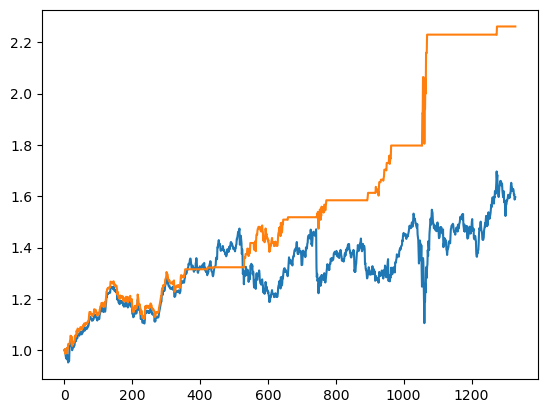

In [3]:
# Downloading stock data
stock = "JNJ"
data = yf.download(stock, '2016-01-01', '2021-04-16')

# specifying strategy parameters 
fee = 0.0005
sr_sell = 0.7
sr_buy = 0.3

# coding technical analysis signals
data['returns'] = data['Close'].pct_change()
data['scaled price'] = data['Close']/10**np.floor(np.log10(data['Close']))
data['S&R'] = data['scaled price']%1

# simulating trading strategies
data['signal'] = 1*(data['S&R'] < sr_buy) - 1*(data["S&R"] > sr_sell)
BnH_return = np.array(data['returns'][1:])
SR_return = np.array(data['returns'][1:])*np.array(data['signal'][:-1]) - fee*abs(np.array(data['signal'][1:]) - np.array(data['signal'][:-1]))
BnH = np.prod(1 + BnH_return)**(252/len(BnH_return)) - 1
SR = np.prod(1 + SR_return)**(252/len(SR_return)) - 1
BnH_risk = np.std(BnH_return)*(np.sqrt(252))
SR_risk = np.std(SR_return)*(np.sqrt(252))

# visualizing the results
print("buy-and-hold strategy return and risk: " + str(round(BnH*100, 2))+"% and"+str(round(BnH_risk*100, 2))+'%')
print("Support and Resistance strategy return and risk: " + str(round(SR*100, 2))+"% and"+str(round(SR_risk*100, 2))+'%')
plt.plot(np.append(1, np.cumprod(1+BnH_return)))
plt.plot(np.append(1, np.cumprod(1+SR_return)))
plt.show()